# Classification using Convolutional Neural Network

# Introduction

In this tutorial, we will learn how to use the Convolutional Neural Network (CNN) to build models for classificaiton problems. We will use the popular MNIST dataset, a dataset of images.

The MNIST database, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

# Download the dataset

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/api/datasets/).

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.


In [1]:
import keras

# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.

In [2]:
# Compute the number of images in training and testing set.

print(len(X_train))

print(len(X_test))


60000
10000


Let's visualize the first image in the training set using Matplotlib's scripting layer.

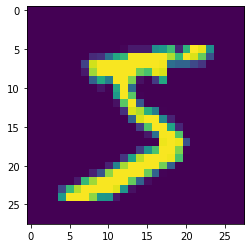

In [3]:
# To complete

import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [4]:
# Next we need to prepare the data so that it is suitable for use training a CNN.

In [5]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Let's normalize the pixel values to be between 0 and 1

In [6]:
# Normalization of images
X_train = (X_train - X_train.mean()) / X_train.std()
X_test =  (X_test - X_test.mean()) / X_test.std()

Next, let's convert the target variable into one hot encoding

In [7]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Here we have to classify the digits(0-9). so the number of classes will be 10
num_classes = 10 # number of classes

# Build and evaluate a neural network

Next, let's define our neural network model. 

In [8]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.layers import Flatten 
from keras.layers import Dense
def small_convnet():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Let's call the function to create the model, and then train it. The model is fit over 10 epochs with a batch size of 200.

In [9]:
# Call the small_convnet function to generate the model 
model = small_convnet()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 3s - loss: 0.2056 - accuracy: 0.9399 - val_loss: 0.0717 - val_accuracy: 0.9784
Epoch 2/10
300/300 - 1s - loss: 0.0628 - accuracy: 0.9812 - val_loss: 0.0523 - val_accuracy: 0.9826
Epoch 3/10
300/300 - 1s - loss: 0.0460 - accuracy: 0.9865 - val_loss: 0.0490 - val_accuracy: 0.9844
Epoch 4/10
300/300 - 1s - loss: 0.0342 - accuracy: 0.9898 - val_loss: 0.0431 - val_accuracy: 0.9862
Epoch 5/10
300/300 - 1s - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0498 - val_accuracy: 0.9853
Epoch 6/10
300/300 - 1s - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0367 - val_accuracy: 0.9880
Epoch 7/10
300/300 - 1s - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0411 - val_accuracy: 0.9879
Epoch 8/10
300/300 - 1s - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0387 - val_accuracy: 0.9876
Epoch 9/10
300/300 - 1s - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.0429 - val_accuracy: 0.9864
Epoch 10/10
300/300 - 1s - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0476 - val_accuracy: 0.9862

Finally, evaluate the trained model.

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9861999750137329 
 Error: 1.380002498626709


## Tasks

Let's redefine our convolutional model so that it is capable of close to state-of-the-art results. The required netwrok topology can be specified as follows:
1. Convolutional layer with 30 feature maps of size 5x5.
2. Pooling layer taking the max over 2x2 patches.
3. Convolutional layer with 15 feature maps of size 3x3.
4. Pooling layer taking the max over 2x2 patches.
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectifier activation.
8. Fully connected layer with 50 neurons and rectifier activation.
9. Output layer.

In [11]:
# Defining the given convolutional model
from keras.layers import Dropout 

def new_conv_net():
    
    # create the model defined above
    model = Sequential()
    #First block comprises of Convolutional layer with 30 feature maps of size 5x5 and Pooling layer taking the max over 2x2 patches.
    model.add(Conv2D(30, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    #Second block comprises of Convolutional layer with 15 feature maps of size 3x3 and Pooling layer taking the max over 2x2 patches.
    model.add(Conv2D(15, (3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    #Dropout layer
    model.add(Dropout(0.2))  

    model.add(Flatten())
    #Fully Connected Layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model


Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.

In [12]:
# Call the newly defined convolutional Neural Network
model = new_conv_net()
model.summary()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 15)        0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 15)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [13]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9890999794006348 
 Error: 1.0900020599365234


Here, it is seen that the newly defined model actually improves the performance and decreased the error.

# Question-Answer Section: 

##Questions-1. 
How many parameters do we have in this second model? What percentage of the parameter does the last dense layer contribute w.r.t. the overall number of parameters? How many parameters are there in the pooling layers?

##Answer:

Here, From the model summary of the final model, it is seen that the second model has 779,933 parameters. The last dense layer contribute 510 parameters which is basically 0.065 percent of the overall number of parameters. 

It is also seen that, there is no learnable parameter in the pooling layers. It is realizable because pooling operation is a downsampling operation and it requires no learnable parameters.



##Question-2: 
Use average pooling layer after each of the two convolution layer and compare the results.

##Answer:
To investigate the performance of average pooling layer in comparison with max pooling layer, the max pooling operation in the first two blocks is replaced by average pooling layers. The model is now defined as below:


In [14]:
from keras.layers.convolutional import AveragePooling2D

def new_conv_net():
    
    # create model
    model = Sequential()
    # Average pooling operation replace the max pooling operation in the final defined model.
    model.add(Conv2D(30, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))
    model.add(Conv2D(15, (3, 3), strides=(1, 1), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Dropout(0.2))  

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [15]:
# To complete
# To complete
model = new_conv_net()
model.summary()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 15)        4065      
_________________________________________________________________
average_pooling2d_1 (Average (None, 20, 20, 15)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 15)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

Now lets evaluate the model performance

In [16]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.991100013256073 
 Error: 0.8899986743927002


Here it is seen that the model performance is improved and the loss is decreased in comparison with the previous sitation where max pooling is used in place of average pooling.

##Question-3:
 Does use of LeakyRelu help improve the accuracy?

##Answer:

ReLU is non-linear and has the advantage of not having any backpropagation errors unlike the sigmoid function, also for larger Neural Networks, the speed of building models based off on ReLU is very fast opposed to using Sigmoids. 
However, ReLUs aren’t without any drawbacks some of them are that ReLU is Non Zero centered and is non differentiable at Zero, but differentiable anywhere else.

Another problem we see in ReLU is the Dying ReLU problem where some ReLU Neurons essentially die for all inputs and remain inactive no matter what input is supplied, here no gradient flows and if large number of dead neurons are there in a Neural Network its performance is affected, this can be corrected by making use of what is called Leaky ReLU where slope is changed left of x=0 in below figure and thus causing a leak and extending the range of ReLU.

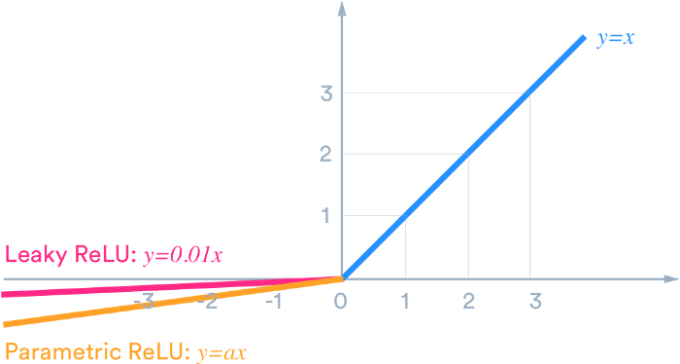

To investigate the performance of Activation function 'Leakyrelu', a two stage procedure is followed. 

At first stage, the leakyrelu activation function is used only in the convoltional blocks. But in the fully connected layers, 'relu' activation function will be used.  

In the second stage, the leakyrelu activation function will be used in both convolutional blocks and fully connected layers.

First, lets place the leaky relu operation in the convolutional blocks without changing the 'relu' activation function in the flly connected layers.



In [17]:
from keras.layers import LeakyReLU

def new_conv_net():
    
    # create model
    model = Sequential()
    # 'Relu' Activation function is replaced by leakyrelu activation function. 
    #  Here, a small gradient alpha = 0.01 is allowed which is basically the negative slope coefficient.
    model.add(Conv2D(30, (5, 5), strides=(1, 1), activation=LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Conv2D(15, (3, 3), strides=(1, 1), activation=LeakyReLU(alpha=0.01)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Dropout(0.2))  

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [18]:
# Call the newly defined model
model = new_conv_net()
model.summary()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
average_pooling2d_2 (Average (None, 23, 23, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 15)        4065      
_________________________________________________________________
average_pooling2d_3 (Average (None, 20, 20, 15)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 20, 15)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

Now lets evaluate the model performance

In [19]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9894999861717224 
 Error: 1.0500013828277588


So, it is seen that use of leaky relu will in the convolutional layer doesn't help to improve the accuracy. Now we will move the second stage.

In [20]:
from keras.layers import LeakyReLU

def new_conv_net():
    
    # create model
    model = Sequential()
    # 'Relu' Activation function is replaced by leakyrelu activation function. 
    #  Here, a small gradient alpha = 0.01 is allowed which is basically the negative slope coefficient.
    model.add(Conv2D(30, (5, 5), strides=(1, 1), activation=LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Conv2D(15, (3, 3), strides=(1, 1), activation=LeakyReLU(alpha=0.01)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Dropout(0.2))  

    model.add(Flatten())
    model.add(Dense(128, activation=LeakyReLU(alpha=0.01)))
    model.add(Dense(50, activation=LeakyReLU(alpha=0.01)))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [21]:
# Call the newly defined model
model = new_conv_net()
model.summary()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
average_pooling2d_4 (Average (None, 23, 23, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 15)        4065      
_________________________________________________________________
average_pooling2d_5 (Average (None, 20, 20, 15)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 20, 15)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

Now lets evaluate the model performance

In [22]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9865999817848206 
 Error: 1.3400018215179443


Now it is seen that use of leakyrelu in all the layers even decrease the performace of the model.